Assignment: Flowers Recognition
Dataset Description:

This dataset contains 4242 images of flowers.
The data collection is based on the data flicr, google images, yandex images.
You can use this datastet to recognize plants from the photo.

Attribute Information:
The pictures are divided into five classes: chamomile, tulip, rose, sunflower, dandelion.
For each class there are about 800 photos. Photos are not high resolution, about 320x240 pixels.
Also explore how to resize images in tensorflow and then resize all the images to a same size.
This is a Multiclass Classification Problem.

WORKFLOW :
Load Data
Split into 60 and 40 ratio.
Encode labels.
Create Model
Compilation Step (Note : Its a Multiclass Classification problem , select loss , metrics according to it)
Train the Model.
If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .
Prediction should be > 85%
Evaluation Step
Prediction

Data :
https://drive.google.com/file/d/1-OX6wn5gA-bJpjPNfSyaYQLz-A-AB_uj/view?usp=sharing

In [169]:
import pandas as pd
import numpy as np 
import tensorflow as tf
from tensorflow import keras
from keras import models
from keras import layers
import cv2
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img 
from keras.models import Sequential 
from keras import optimizers
import os
from PIL import Image
from keras.preprocessing import image
from keras.layers import Dropout, Flatten, Dense 
from keras import applications 
from keras.utils.np_utils import to_categorical 
import matplotlib.pyplot as plt 
%matplotlib inline
import math 
import datetime
from sklearn.model_selection import train_test_split
import time

In [170]:
# rm -r flowers-dataset/.DS_Store

In [171]:
flowers = os.listdir('flowers-dataset/')

print(flowers)

['daisy', 'rose', 'tulip', 'dandelion', 'sunflower']


### Creating dataset, reshaping/resizing images and normalizing array values b/w 0 to 1

In [172]:
flower_labels = []
flower_images = []
dimension = 180, 180
image_names = []

for flower_class in flowers:
    for image in os.listdir(os.path.join('flowers-dataset/', flower_class)):
        if image.endswith("jpg"):
            image_names.append(os.path.join('flowers-dataset/', flower_class, image))
            flower_labels.append(flower_class)
            img = cv2.imread(os.path.join('flowers-dataset/', flower_class, image))
            isn = cv2.resize(img, dimension)
            # normalizing
            flower_images.append(np.array(isn).astype('float32') / 255.0)
        else:
            continue
      

In [173]:
flower_images = np.array(flower_images)

In [174]:
# total images
len(flower_images)

4323

In [175]:
flower_images[0].shape

(180, 180, 3)

In [176]:
flower_images[0].shape

(180, 180, 3)

#### Images after resize/reshape

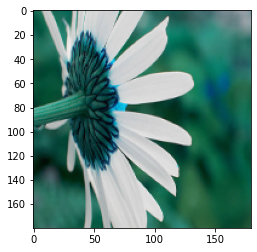

In [177]:
plt.imshow(flower_images[0])
plt.show()

In [178]:
flower_labels[0]

'daisy'

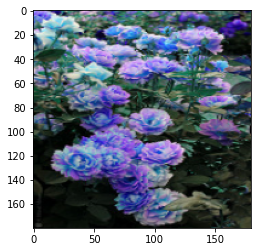

In [179]:
plt.imshow(flower_images[1000])
plt.show()

In [180]:
flower_labels[1000]

'rose'

In [181]:
pd.unique(flower_labels)

array(['daisy', 'rose', 'tulip', 'dandelion', 'sunflower'], dtype=object)

##### Label encoding

In [182]:
dummies = pd.get_dummies(flower_labels)
flower_labels =  dummies.values.argmax(1)

In [183]:
flower_labels

array([0, 0, 0, ..., 3, 3, 3])

In [184]:
len(flower_labels)

4323

In [185]:
pd.unique(flower_labels)

array([0, 2, 4, 1, 3])

In [186]:
flower_images

array([[[[0.10588235, 0.4       , 0.31764707],
         [0.11764706, 0.40392157, 0.32156864],
         [0.13333334, 0.4117647 , 0.33333334],
         ...,
         [0.54901963, 0.62352943, 0.6509804 ],
         [0.53333336, 0.6156863 , 0.64705884],
         [0.49019608, 0.6       , 0.627451  ]],

        [[0.08235294, 0.38431373, 0.3019608 ],
         [0.09411765, 0.39215687, 0.30980393],
         [0.10980392, 0.40392157, 0.32156864],
         ...,
         [0.5372549 , 0.61960787, 0.6431373 ],
         [0.5254902 , 0.6117647 , 0.63529414],
         [0.4745098 , 0.5921569 , 0.6156863 ]],

        [[0.0627451 , 0.3764706 , 0.3019608 ],
         [0.07450981, 0.38039216, 0.29803923],
         [0.08627451, 0.39607844, 0.3137255 ],
         ...,
         [0.53333336, 0.61960787, 0.6431373 ],
         [0.52156866, 0.60784316, 0.6313726 ],
         [0.46666667, 0.5882353 , 0.60784316]],

        ...,

        [[0.14901961, 0.37254903, 0.3137255 ],
         [0.16470589, 0.39215687, 0.32156864]

#### Train Test Split and data shuffling in 60 40 ratio 

In [187]:
flower_labels = np.array(flower_labels)

In [188]:
X_train, X_test, y_train, y_test = train_test_split(flower_images, flower_labels, test_size=0.40, shuffle=True)

In [199]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25)

In [200]:
np.shape(X_train),np.shape(y_train),np.shape(X_test),np.shape(y_test),np.shape(X_val),np.shape(y_val)

((1944, 180, 180, 3),
 (1944,),
 (1730, 180, 180, 3),
 (1730,),
 (649, 180, 180, 3),
 (649,))

In [193]:
data_augmentation

In [237]:
model = keras.Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(256, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Flatten(),
  layers.Dense(512, activation='relu'),
  layers.Dense(5)
])


In [238]:
print(model.summary())

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_21 (Sequential)   (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 22, 22, 64)      

In [241]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [243]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
61/61 [==============================] - 24s 399ms/step - loss: 1.1791 - accuracy: 0.5237
Epoch 2/100
61/61 [==============================] - 26s 419ms/step - loss: 1.1415 - accuracy: 0.5422
Epoch 3/100
61/61 [==============================] - 26s 434ms/step - loss: 1.0254 - accuracy: 0.5998
Epoch 4/100
61/61 [==============================] - 41s 671ms/step - loss: 0.9795 - accuracy: 0.6055
Epoch 5/100
61/61 [==============================] - 38s 628ms/step - loss: 0.9264 - accuracy: 0.6384
Epoch 6/100
61/61 [==============================] - 32s 526ms/step - loss: 0.8971 - accuracy: 0.6595
Epoch 7/100
61/61 [==============================] - 32s 528ms/step - loss: 0.8747 - accuracy: 0.6590
Epoch 8/100
61/61 [==============================] - 38s 621ms/step - loss: 0.8108 - accuracy: 0.6867
Epoch 9/100
61/61 [==============================] - 38s 626ms/step - loss: 0.8021 - accuracy: 0.6893
Epoch 10/100
61/61 [==============================] - 35s 578ms/step - loss: 0.777

61/61 [==============================] - 34s 550ms/step - loss: 0.1457 - accuracy: 0.9486
Epoch 81/100
61/61 [==============================] - 32s 525ms/step - loss: 0.1333 - accuracy: 0.9532
Epoch 82/100
61/61 [==============================] - 31s 516ms/step - loss: 0.0934 - accuracy: 0.9676
Epoch 83/100
61/61 [==============================] - 34s 562ms/step - loss: 0.1098 - accuracy: 0.9614
Epoch 84/100
61/61 [==============================] - 36s 593ms/step - loss: 0.1130 - accuracy: 0.9635
Epoch 85/100
61/61 [==============================] - 32s 524ms/step - loss: 0.1058 - accuracy: 0.9614
Epoch 86/100
61/61 [==============================] - 32s 532ms/step - loss: 0.1099 - accuracy: 0.9619
Epoch 87/100
61/61 [==============================] - 34s 554ms/step - loss: 0.0934 - accuracy: 0.9686
Epoch 88/100
61/61 [==============================] - 34s 551ms/step - loss: 0.1192 - accuracy: 0.9599
Epoch 89/100
61/61 [==============================] - 32s 519ms/step - loss: 0.1279 - 

In [220]:
# model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

### END